# Word Frequency: Vaccine

The following exercise determines word frequency for blocks of countries over time. For this analysis, we are using the normalized sum i.e. we are taking the number of files into account to get a better idea of word usage.

## Import Libraries

In [1]:
import pandas as pd # For dataframe analysis
import numpy as np
import re # Regix to remove punctuation from strings I split
from sklearn.feature_extraction.text import CountVectorizer # For creating document-term matrix & excluding stop words
from sklearn.feature_extraction import text # For getting stop words
import matplotlib.pyplot as plt # For graphs
import seaborn as sns # For graphs
%matplotlib inline

## Global Variables and Dataframe

Declaring the global variables and dataframe on top of the code so that they can be called multiple times later.

In [2]:
wordList = ['vaccine', 'vaccinations', 'vaccination', 'immunisation', 'immunity']
yearMonths = ['201912', '202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008']
yearMonthsWord = ['Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020']

In [3]:
# Get dataframes, combine them and take a look
ae_df = pd.read_csv('Clean Data/AE_cleandf.csv')
cn_df = pd.read_csv('Clean Data/CN_cleandf.csv')
de_df = pd.read_csv('Clean Data/DE_cleandf.csv')
fr_df = pd.read_csv('Clean Data/FR_cleandf.csv')
ir_df = pd.read_csv('Clean Data/IR_cleandf.csv')
kw_df = pd.read_csv('Clean Data/KW_cleandf.csv')
qa_df = pd.read_csv('Clean Data/QA_cleandf.csv')
ru_df = pd.read_csv('Clean Data/RU_cleandf.csv')
sa_df = pd.read_csv('Clean Data/SA_cleandf.csv')
tr_df = pd.read_csv('Clean Data/TR_cleandf.csv')
uk_df = pd.read_csv('Clean Data/UK_cleandf.csv')
us_df = pd.read_csv('Clean Data/US_cleandf.csv')

In [4]:
df = pd.concat([ae_df, cn_df, de_df, fr_df, ir_df, kw_df, qa_df, ru_df, sa_df, tr_df, uk_df, us_df], ignore_index=True)

In [5]:
df

,name,path,country,network,date,token_freq,text
0,20200619_AE_EmiratesNewsAgency_NEXIS212.txt,Raw text/AEClean/20200619_AE_EmiratesNewsAgenc...,AE,EmiratesNewsAgency,20200619,4,MELBOURNE 18th June 2020 WAM The UAE General C...
1,20200422_AE_AlArabiya_FACTIVA2484.txt,Raw text/AEClean/20200422_AE_AlArabiya_FACTIVA...,AE,AlArabiya,20200422,13,020 Al Arabiya All rights Reserved Provided by...
2,20200328_AE_TheNational_GDELT136558.txt,Raw text/AEClean/20200328_AE_TheNational_GDELT...,AE,TheNational,20200328,10,UAE offers to help Syria counter coronavirus t...
3,20200616_AE_KhaleejTimes_NEXIS59.txt,Raw text/AEClean/20200616_AE_KhaleejTimes_NEXI...,AE,KhaleejTimes,20200616,3,LOréal Middle East has launched a UAE solidari...
4,20200318_AE_TheNational_NEXIS18486.txt,Raw text/AEClean/20200318_AE_TheNational_NEXIS...,AE,TheNational,20200318,16,Medical staff push a patient on a gurney to a ...
...,...,...,...,...,...,...,...
13426,20200402_US_AssociatedPress_SERP11978.txt,Raw text/USClean/20200402_US_AssociatedPress_S...,US,AssociatedPress,20200402,5,World Food Program USA Allocates 333000 in Eme...
13427,20200629_US_TheNewYorkTimes_NEXIS794361.txt,Raw text/USClean/20200629_US_TheNewYorkTimes_N...,US,TheNewYorkTimes,20200629,13,The country has been hit with a triplewhammy r...
13428,20200520_US_CNN_GNAPI69344.txt,Raw text/USClean/20200520_US_CNN_GNAPI69344.txt,US,CNN,20200520,18,CNNChinese leader Xi Jinping made preserving d...
13429,20200402_US_VOA_GDELT131430.txt,Raw text/USClean/20200402_US_VOA_GDELT131430.txt,US,VOA,20200402,22,WASHINGTON North Koreas decision to protect it...


## Replace Country Names

Since I want to analyse blocks of countries, I will simply replace their names with block names so that I can easily filter them.

In [8]:
help(df.replace)

Help on method replace in module pandas.core.frame:

replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad') method of pandas.core.frame.DataFrame instance
    Replace values given in `to_replace` with `value`.
    
    Values of the DataFrame are replaced with other values dynamically.
    This differs from updating with ``.loc`` or ``.iloc``, which require
    you to specify a location to update with some value.
    
    Parameters
    ----------
    to_replace : str, regex, list, dict, Series, int, float, or None
        How to find the values that will be replaced.
    
        * numeric, str or regex:
    
            - numeric: numeric values equal to `to_replace` will be
              replaced with `value`
            - str: string exactly matching `to_replace` will be replaced
              with `value`
            - regex: regexs matching `to_replace` will be replaced with
              `value`
    
        * list of str, regex, or numeric:
 

In [9]:
df = df.replace({'country':'AE'},{'country':'Gulf Countries'},regex=False)
df = df.replace({'country':'KW'},{'country':'Gulf Countries'},regex=False)
df = df.replace({'country':'SA'},{'country':'Gulf Countries'},regex=False)
df = df.replace({'country':'QA'},{'country':'Gulf Countries'},regex=False)
df = df.replace({'country':'US'},{'country':'Euro-Atlantic Countries'},regex=False)
df = df.replace({'country':'UK'},{'country':'Euro-Atlantic Countries'},regex=False)
df = df.replace({'country':'DE'},{'country':'Euro-Atlantic Countries'},regex=False)
df = df.replace({'country':'FR'},{'country':'Euro-Atlantic Countries'},regex=False)
df = df.replace({'country':'CN'},{'country':'New Global Media Players'},regex=False)
df = df.replace({'country':'RU'},{'country':'New Global Media Players'},regex=False)
df = df.replace({'country':'IR'},{'country':'New Global Media Players'},regex=False)
df = df.replace({'country':'TR'},{'country':'New Global Media Players'},regex=False)

In [10]:
df

,name,path,country,network,date,token_freq,text
0,20200619_AE_EmiratesNewsAgency_NEXIS212.txt,Raw text/AEClean/20200619_AE_EmiratesNewsAgenc...,Gulf Countries,EmiratesNewsAgency,20200619,4,MELBOURNE 18th June 2020 WAM The UAE General C...
1,20200422_AE_AlArabiya_FACTIVA2484.txt,Raw text/AEClean/20200422_AE_AlArabiya_FACTIVA...,Gulf Countries,AlArabiya,20200422,13,020 Al Arabiya All rights Reserved Provided by...
2,20200328_AE_TheNational_GDELT136558.txt,Raw text/AEClean/20200328_AE_TheNational_GDELT...,Gulf Countries,TheNational,20200328,10,UAE offers to help Syria counter coronavirus t...
3,20200616_AE_KhaleejTimes_NEXIS59.txt,Raw text/AEClean/20200616_AE_KhaleejTimes_NEXI...,Gulf Countries,KhaleejTimes,20200616,3,LOréal Middle East has launched a UAE solidari...
4,20200318_AE_TheNational_NEXIS18486.txt,Raw text/AEClean/20200318_AE_TheNational_NEXIS...,Gulf Countries,TheNational,20200318,16,Medical staff push a patient on a gurney to a ...
...,...,...,...,...,...,...,...
13426,20200402_US_AssociatedPress_SERP11978.txt,Raw text/USClean/20200402_US_AssociatedPress_S...,Euro-Atlantic Countries,AssociatedPress,20200402,5,World Food Program USA Allocates 333000 in Eme...
13427,20200629_US_TheNewYorkTimes_NEXIS794361.txt,Raw text/USClean/20200629_US_TheNewYorkTimes_N...,Euro-Atlantic Countries,TheNewYorkTimes,20200629,13,The country has been hit with a triplewhammy r...
13428,20200520_US_CNN_GNAPI69344.txt,Raw text/USClean/20200520_US_CNN_GNAPI69344.txt,Euro-Atlantic Countries,CNN,20200520,18,CNNChinese leader Xi Jinping made preserving d...
13429,20200402_US_VOA_GDELT131430.txt,Raw text/USClean/20200402_US_VOA_GDELT131430.txt,Euro-Atlantic Countries,VOA,20200402,22,WASHINGTON North Koreas decision to protect it...


## Functions

Declaring functions here so I can call them later and reuse them.

In [11]:
# More Cleaning

def cleanTextInDf(mystring):
    mystring = mystring.lower() # Text normalization: make string lowercase
    mystring = re.sub(r'[^\w\s]','', mystring) # Text normalization: remove punctuation
    return mystring

In [12]:
# Get yearmonth value

def checkYearMonth(row):
    value = row['date']
    return str(value)[0:6]

In [13]:
# Combine news article text into months

def combinedTextForCountryDf(country):
    index = 0
    dfCountryYrList = []
    
    for ym in yearMonths:
        combinedText = ' '.join(df[(df['yearmonth'] == ym) & (df['country'] == country)].text)
        numRows, numCols = df[(df['yearmonth'] == ym) & (df['country'] == country)].shape
        dictCountryYr = {'country': country, 'yearmonth': ym, 'text': combinedText, 'shape': numRows}
        dfCountryYrList.append(dictCountryYr)
    return dfCountryYrList

In [14]:
# Cleaning the dataframe
cleanText = lambda text: cleanTextInDf(text) # Lambda function applies to all cells in a column
cleandf = pd.DataFrame(df.text.apply(cleanText)) # .apply() the function to all cells
df['text'] = cleandf['text']
df['yearmonth'] = df.apply(checkYearMonth, axis=1)
df

,name,path,country,network,date,token_freq,text,yearmonth
0,20200619_AE_EmiratesNewsAgency_NEXIS212.txt,Raw text/AEClean/20200619_AE_EmiratesNewsAgenc...,Gulf Countries,EmiratesNewsAgency,20200619,4,melbourne 18th june 2020 wam the uae general c...,202006
1,20200422_AE_AlArabiya_FACTIVA2484.txt,Raw text/AEClean/20200422_AE_AlArabiya_FACTIVA...,Gulf Countries,AlArabiya,20200422,13,020 al arabiya all rights reserved provided by...,202004
2,20200328_AE_TheNational_GDELT136558.txt,Raw text/AEClean/20200328_AE_TheNational_GDELT...,Gulf Countries,TheNational,20200328,10,uae offers to help syria counter coronavirus t...,202003
3,20200616_AE_KhaleejTimes_NEXIS59.txt,Raw text/AEClean/20200616_AE_KhaleejTimes_NEXI...,Gulf Countries,KhaleejTimes,20200616,3,loréal middle east has launched a uae solidari...,202006
4,20200318_AE_TheNational_NEXIS18486.txt,Raw text/AEClean/20200318_AE_TheNational_NEXIS...,Gulf Countries,TheNational,20200318,16,medical staff push a patient on a gurney to a ...,202003
...,...,...,...,...,...,...,...,...
13426,20200402_US_AssociatedPress_SERP11978.txt,Raw text/USClean/20200402_US_AssociatedPress_S...,Euro-Atlantic Countries,AssociatedPress,20200402,5,world food program usa allocates 333000 in eme...,202004
13427,20200629_US_TheNewYorkTimes_NEXIS794361.txt,Raw text/USClean/20200629_US_TheNewYorkTimes_N...,Euro-Atlantic Countries,TheNewYorkTimes,20200629,13,the country has been hit with a triplewhammy r...,202006
13428,20200520_US_CNN_GNAPI69344.txt,Raw text/USClean/20200520_US_CNN_GNAPI69344.txt,Euro-Atlantic Countries,CNN,20200520,18,cnnchinese leader xi jinping made preserving d...,202005
13429,20200402_US_VOA_GDELT131430.txt,Raw text/USClean/20200402_US_VOA_GDELT131430.txt,Euro-Atlantic Countries,VOA,20200402,22,washington north koreas decision to protect it...,202004


In [15]:
countryYrList = combinedTextForCountryDf('Gulf Countries') # This function combines text and returns a list
countryYrDf = pd.DataFrame(countryYrList) # convert list to dataframe
countryYrDf # Show the data frame

,country,yearmonth,text,shape
0,Gulf Countries,201912,wknd inspired living kt home videos interactiv...,7
1,Gulf Countries,202001,wknd inspired living kt home videos interactiv...,10
2,Gulf Countries,202002,wknd inspired living kt home videos interactiv...,50
3,Gulf Countries,202003,uae offers to help syria counter coronavirus t...,377
4,Gulf Countries,202004,020 al arabiya all rights reserved provided by...,652
5,Gulf Countries,202005,dubai 22nd may 2020 wam dubai is roads and tra...,430
6,Gulf Countries,202006,melbourne 18th june 2020 wam the uae general c...,307
7,Gulf Countries,202007,here is a roundup of all the latest covid19 de...,227
8,Gulf Countries,202008,reuters uae authorities have renewed their cal...,84


## Document Term Matrix

Create a document term matrix using CountVectorizer, take transpose and map it to the keywords of interest. In this process, I will use the built-in stopwords vocabulary.

In [16]:
# Using built-in vocabulary for stop words.
# See https://scikit-learn.org/stable/modules/feature_extraction.html#stop-words
vectorizer = CountVectorizer(stop_words='english')
dataVectorizer = vectorizer.fit_transform(countryYrDf.text)
dataDtm = pd.DataFrame(dataVectorizer.toarray(), columns = vectorizer.get_feature_names())
dataDtm.index = countryYrDf.index # lets get the indices from previous dataframe
dataDtm = dataDtm.transpose() # Take a transpose
dataDtm # Take a look at the matrix

,0,1,2,3,4,5,6,7,8
00,0,0,0,0,0,3,0,0,0
000,0,0,0,0,5,2,0,0,0
0000,0,0,0,20,14,14,14,8,2
0001,0,0,0,2,4,11,4,2,1
0002,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
يعملون,0,0,0,0,1,0,0,0,0
يكل,0,0,0,0,0,0,0,1,0
يمر,0,0,0,0,1,0,0,0,0
يونيسيف,0,0,0,0,1,0,0,0,0


In [17]:
dataTf = dataDtm.transpose()[wordList]
dataTf

,vaccine,vaccinations,vaccination,immunisation,immunity
0,2,0,0,0,0
1,1,0,0,0,0
2,9,0,1,0,0
3,43,3,4,2,18
4,115,11,3,10,21
5,108,5,5,3,22
6,145,7,3,9,12
7,92,1,0,2,4
8,37,2,4,1,4


In [26]:
dataTf["sum"] = dataTf.sum(axis=1)
dataTf

,hospitalisation,hospitalisation,emergency,ventilator,respirator,mask,sanitiser,sum
0,0,0,2,0,0,0,0,2
1,0,0,22,0,0,7,0,29
2,0,0,21,0,0,4,1,26
3,0,0,374,1,3,80,12,470
4,2,2,360,17,11,128,7,527
5,3,3,232,3,1,50,0,292
6,3,3,147,4,5,41,0,203
7,1,1,69,3,0,59,0,133
8,0,0,81,0,0,6,0,87


## Function for Term Frequency

I want to create a function to get term frequency for a region. It can be a country as well, but we have replaced country names to regions for this analysis.

Once I have the term frequency for each, I can plot it using a line graph spanning over months.

In [20]:
def getDTM(country):
    countryYrList = combinedTextForCountryDf(country) # This function combines text and returns a list
    countryYrDf = pd.DataFrame(countryYrList) # convert list to dataframe
    vectorizer = CountVectorizer(stop_words='english')
    dataVectorizer = vectorizer.fit_transform(countryYrDf.text)
    dataDtm = pd.DataFrame(dataVectorizer.toarray(), columns = vectorizer.get_feature_names())
    dataDtm.index = countryYrDf.index # lets get the indices from previous dataframe
    dataDtm = dataDtm.transpose() # Take a transpose
    dataTf = dataDtm.transpose()[wordList]
    dataTf["sum"] = dataTf.sum(axis=1)
    dataTf['normalized_sum'] = dataTf["sum"]/countryYrDf['shape']
    return dataTf

In [21]:
GFTf = getDTM('Gulf Countries')
EACTf = getDTM('Euro-Atlantic Countries')
NGMPTf = getDTM('New Global Media Players')

Text(0.5, 1.0, 'Mention of Medical Response')

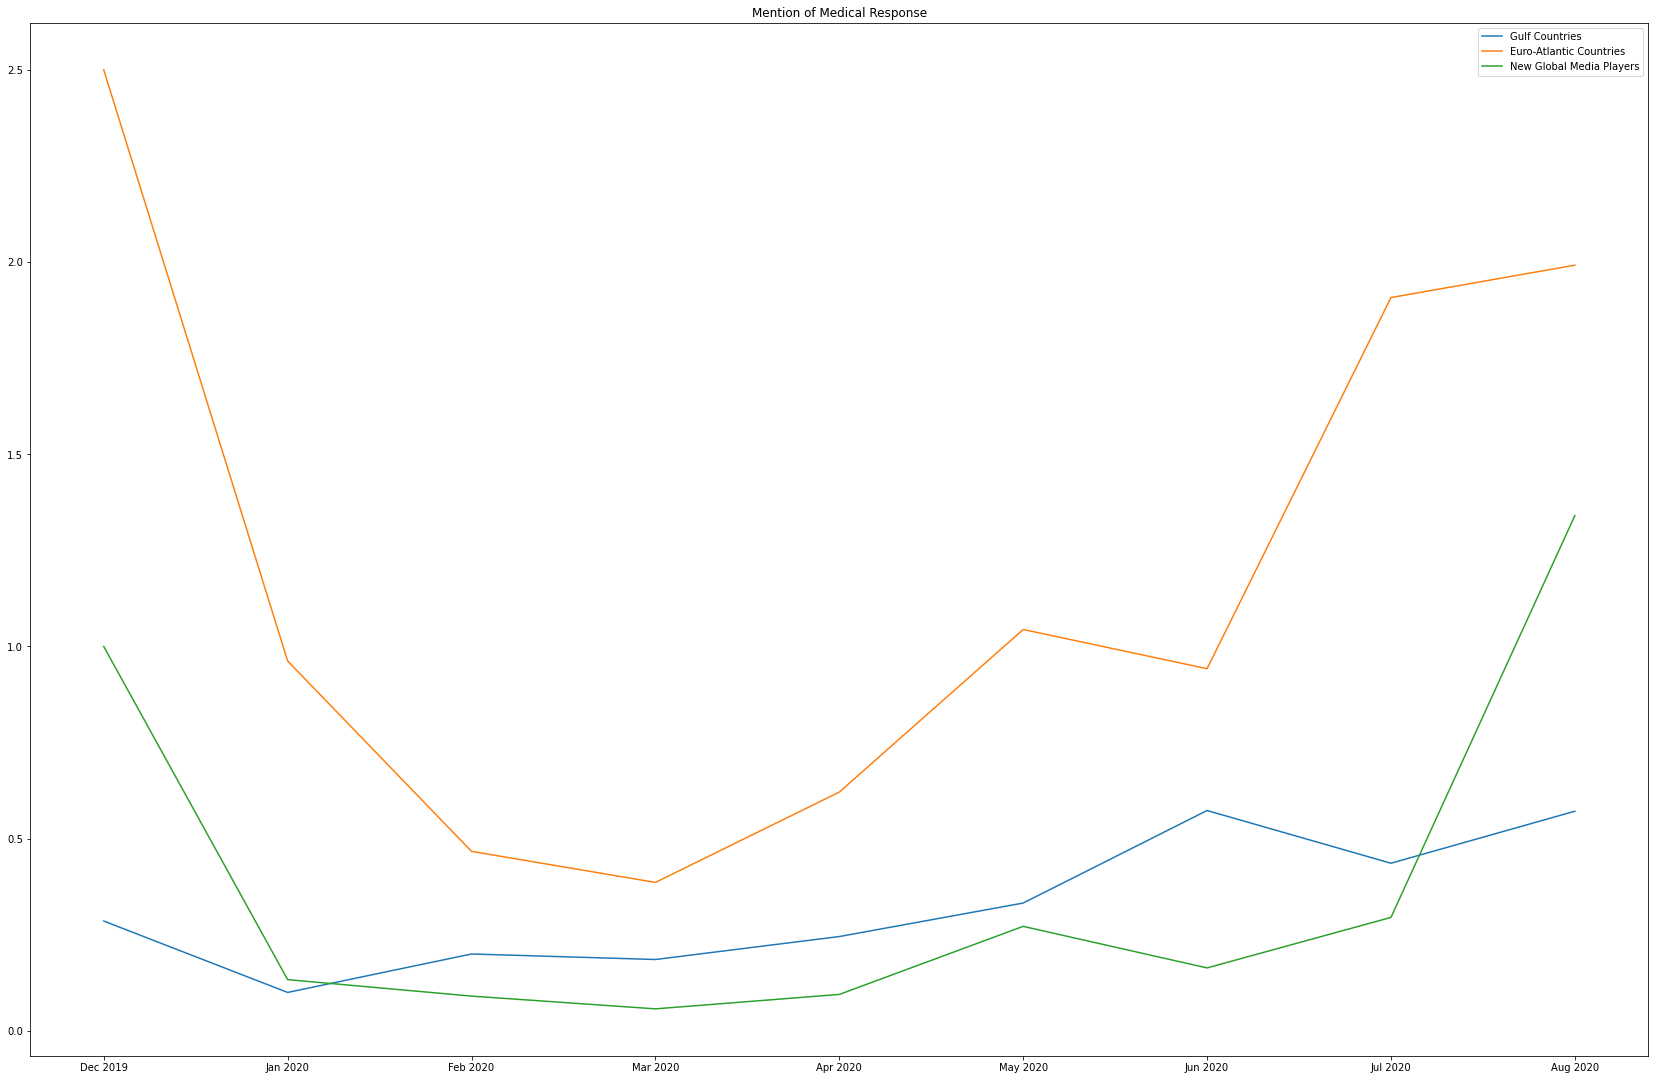

In [22]:
plt.figure(figsize=(29, 19))
# plt.subplot(4, 3, index+1)
plt.plot(yearMonthsWord, GFTf['normalized_sum'], label='Gulf Countries')
plt.plot(yearMonthsWord, EACTf['normalized_sum'], label='Euro-Atlantic Countries')
plt.plot(yearMonthsWord, NGMPTf['normalized_sum'], label='New Global Media Players')
plt.legend()
plt.title('Mention of Medical Response') # make the term the title

In [23]:
arr = GFTf["normalized_sum"].to_numpy()
arr

array([0.28571429, 0.1       , 0.2       , 0.18567639, 0.24539877,
       0.33255814, 0.5732899 , 0.43612335, 0.57142857])

In [24]:
arr = EACTf["normalized_sum"].to_numpy()
arr

array([2.5       , 0.96226415, 0.46703297, 0.38622386, 0.62117951,
       1.04420866, 0.94222834, 1.9077381 , 1.99202128])

In [25]:
arr = NGMPTf["normalized_sum"].to_numpy()
arr

array([1.        , 0.13333333, 0.09045226, 0.05728643, 0.09481481,
       0.27190332, 0.1637931 , 0.29518072, 1.34042553])

## Conclusion

I was able to plot the graph in Python. I also created arrays for each block so that I can use it for visualization. The term frequency is visualized on the website using HighCharts line graphs where you will also find detailed analysis.